# Exercício de classificação usando KNN

Este exercício aborda a classificação de um conjunto de resultados usando o classificador KNN, um dos algoritmos de Machine Learning mais conhecidos e aplicados.

O algoritmo do KNN é bem simpes. Ele pode ser sumarizado da seguinte forma:

1. Calcular a distância entre a amostra desconhecida e todos os elementos do conjunto de classificação.
2. Usamos uma função de dissimilaridade, como a distância Euclidiana, a distância de Manhattan, a Hamming, entre outras.
3. O modelo então seleciona os K elementos mais próximos da amostra desconhecida.
4. A classe é decidida por votação majoritária, ou seja, a amostra é classificada com a classe que obteve o maior número de vizinhos próximos.

Para a construção do modelo, devemos usar alguns procedimentos como validação cruzada (cross validation), para garantir que este tem boa capacidade de generalização.

## 1. Carregando as bibliotecas

Comece carregando no ambiente as bibliotecas que utilizaremos para completar o exercício. Vamos utilizar o numpy, o pandas e o matplotlib para carregar os valores, fazer a análise dos dados e a exibicição dos resultados, respectivamente.

In [63]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
%matplotlib inline


Agora, vamos carregar um conjunto de dados para classificarmos. No pacote SciKit Learning, encontramos algumas bases de dados prontas para uso, como a Iris, que vimos anteriormente. Para este exercício, usaremos uma base diferente, a base de dados de exames de câncer de mama do hospital-escola de Winsconsin (mais informações sobre a base [aqui](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)/).

Carregue a função load_breast_cancer do pacote sklearn.datasets. Crie uma variável com o nome *universe* e carregue nela a base de dados. Em seguida, exiba os nomes dos atributos e as 5 primeiras linhas do conjunto de dados. Imprima também os nomes das classes. A primeira estará rotulada como 0 e a segunda como 1.

In [64]:
from sklearn.datasets import load_breast_cancer
universe = load_breast_cancer()
atrib_names = universe['target_names']
lab_data = universe.data
class_name = universe['target']


In [65]:
# Dados
print(atrib_names)
print(lab_data[:5])
print(class_name)

['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.

## 2. Treinando o modelo

Agora, vamos treinar o modelo, usando o utilitário de validação cruzada do pacote Scikit Learning.

Separe o conjunto de dados em 4 variáveis: X_treino, X_teste, Y_treino e Y_teste. Os arquivos X contém os dados de treino e teste e os conjuntos Y contém os rótulos correspondentes. Use a função train_test_split do pacote sklearn.model_selection. Não se esqueça de importá-la. Imprima os shapes do conjunto de dados e de rótulos de treino.

In [66]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(lab_data, class_name, test_size=0.2, random_state=42)
print(X_treino.shape)
print(X_teste.shape)


(455, 30)
(114, 30)


Agora que os conjuntos de dados foram separados, vamos instanciar o classificador e treiná-lo. Importe a classe KNeighborsClassifier do pacote sklearn.neighbors. Rode várias instâncias de treinamento e previsão, usando os conjuntos de treino e teste, variando o valor de K entre 1 e 25. Use o pacote sklearn.metrics para medir a acurácia de cada instância, salvando o resultado. Use o matplotlib para exibir a acurácia de cada instância. Não se esqueça de identificar os rótulos dos eixos.

In [67]:
neigh =  KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_treino, Y_treino)

print(neigh)

pred = neigh.predict(X_teste)
print (accuracy_score(Y_teste, pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
0.9298245614035088


1 0.9298245614035088
2 0.9298245614035088
3 0.9298245614035088
4 0.9385964912280702
5 0.956140350877193
6 0.9649122807017544
7 0.956140350877193
8 0.956140350877193
9 0.956140350877193
10 0.9736842105263158
11 0.9824561403508771
12 0.9824561403508771
13 0.9736842105263158
14 0.9736842105263158
15 0.9649122807017544
16 0.9649122807017544
17 0.9649122807017544
18 0.9649122807017544
19 0.9649122807017544
20 0.9649122807017544
21 0.9649122807017544
22 0.9649122807017544
23 0.956140350877193
24 0.9649122807017544


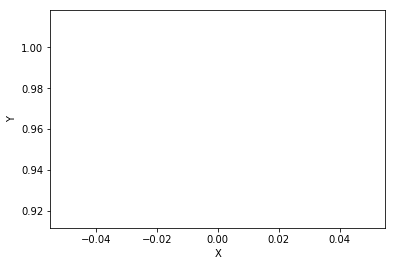

In [82]:
from sklearn import metrics

for k in range (1,25):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_treino, Y_treino)
    pred = neigh.predict(X_teste)
    acc = accuracy_score(Y_teste, pred)
    print (k,acc)
 
    
    
plt.plot(acc)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
        
    
 
   



## 3. Treinando o modelo final e realizando previsões

Observe pelo gráfico qual o menor valor de K que nos dá a maior acurácia. Treine um novo classificador usando o valor observado para K. Faça a previsão usando o conjunto de teste previamente separado e exiba a matriz de confusão.

Por fim, faça uma análise de como a acurácia o classificador é afetado mudando-se a função de distância. Consulte a documentação da classe DistanceMetric do sklearn para verificar quais funções estão disponíveis (lembrando que o espaço vetorial deste conjunto de dados é real). Exiba um gráfico com as acurácias de cada função de distância, usando o melhor valor de K observado anteriormente.